In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy import stats
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import LabelEncoder

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Csv folder/employee_attrition_train.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


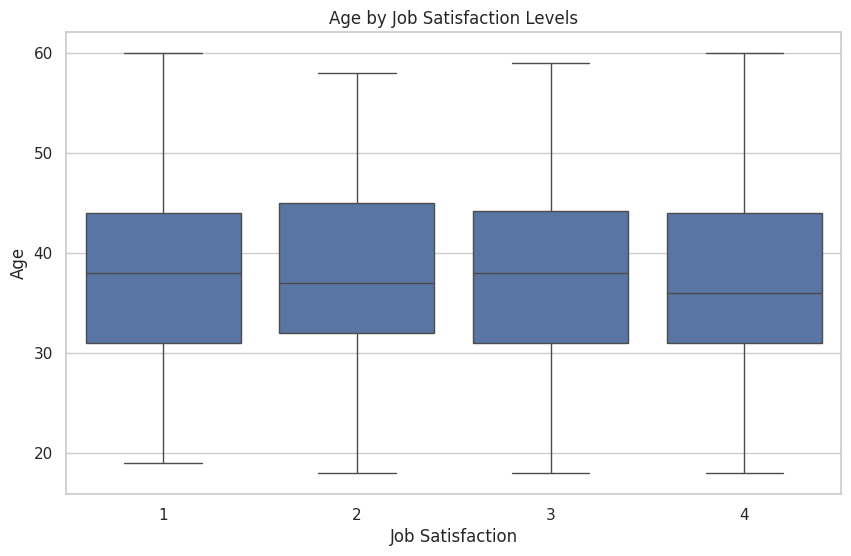

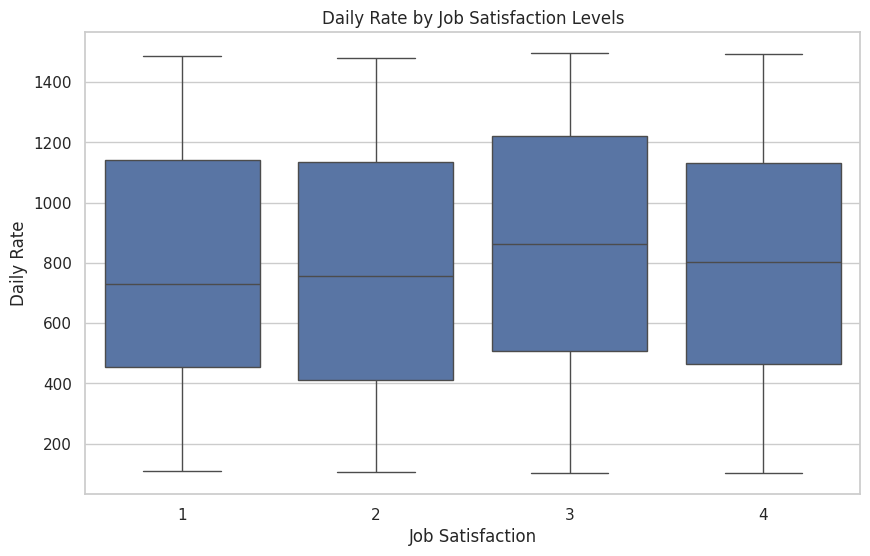

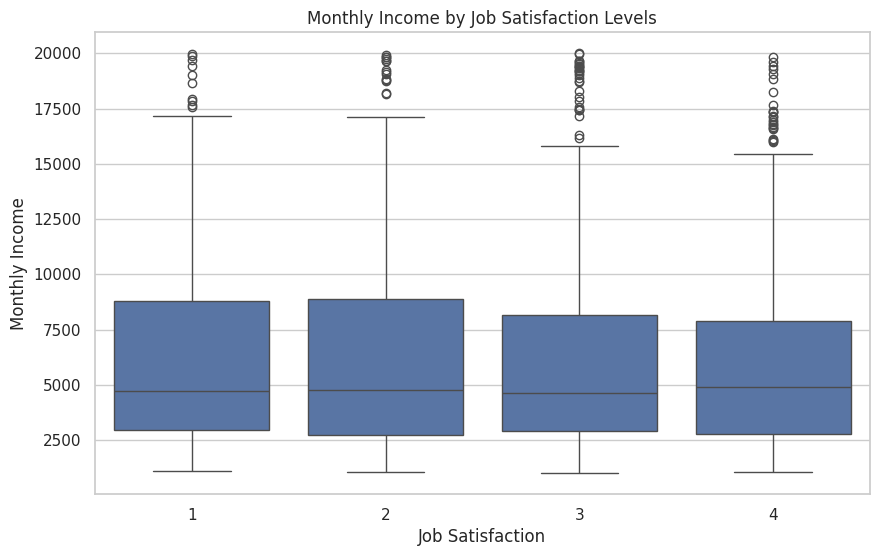

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='Age', data=data)
plt.title("Age by Job Satisfaction Levels")
plt.xlabel("Job Satisfaction")
plt.ylabel("Age")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='DailyRate', data=data)
plt.title("Daily Rate by Job Satisfaction Levels")
plt.xlabel("Job Satisfaction")
plt.ylabel("Daily Rate")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=data)
plt.title("Monthly Income by Job Satisfaction Levels")
plt.xlabel("Job Satisfaction")
plt.ylabel("Monthly Income")
plt.show()


Daily Rate: The distribution of daily rates across different job satisfaction levels (1 to 4) appears to be quite similar. The median daily rates and the spread (range) don’t show notable variation across job satisfaction levels. This suggests that job satisfaction may not significantly affect the daily rate, as the distribution remains consistent across the levels.

Monthly Income: Similarly, the monthly income distributions across different job satisfaction levels are fairly close in both median and spread. While there are outliers at each level, the main range of values does not differ dramatically between levels of job satisfaction.

Age:  age is also relatively consistent across job satisfaction levels, implying that job satisfaction is not strongly associated with employees' age in this dataset.

Shapiro-Wilk test for Age at Job Satisfaction level 4: p-value = nan
Shapiro-Wilk test for Age at Job Satisfaction level 2: p-value = nan
Shapiro-Wilk test for Age at Job Satisfaction level 3: p-value = nan
Shapiro-Wilk test for Age at Job Satisfaction level 1: p-value = nan
Shapiro-Wilk test for DailyRate at Job Satisfaction level 4: p-value = nan
Shapiro-Wilk test for DailyRate at Job Satisfaction level 2: p-value = nan
Shapiro-Wilk test for DailyRate at Job Satisfaction level 3: p-value = nan
Shapiro-Wilk test for DailyRate at Job Satisfaction level 1: p-value = nan
Shapiro-Wilk test for MonthlyIncome at Job Satisfaction level 4: p-value = 1.1923004837118206e-17
Shapiro-Wilk test for MonthlyIncome at Job Satisfaction level 2: p-value = 6.087573033561635e-15
Shapiro-Wilk test for MonthlyIncome at Job Satisfaction level 3: p-value = 6.954154226693409e-19
Shapiro-Wilk test for MonthlyIncome at Job Satisfaction level 1: p-value = 4.035679422941438e-14
Levene's test for Age: p-value = na

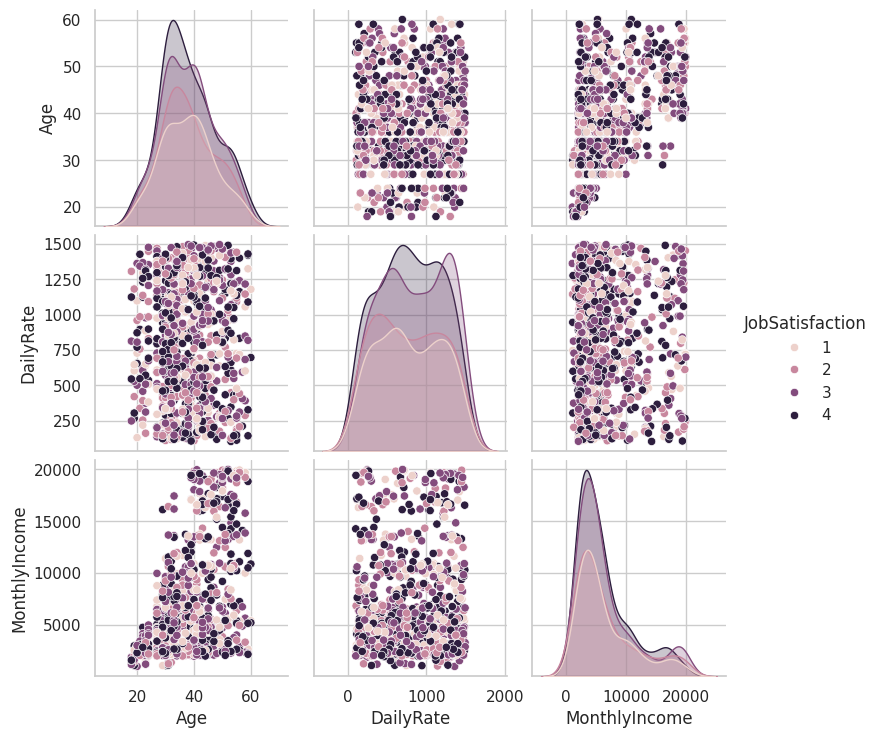

Correlation matrix:
                     Age  DailyRate  MonthlyIncome
Age            1.000000   0.023845       0.492360
DailyRate      0.023845   1.000000       0.023055
MonthlyIncome  0.492360   0.023055       1.000000
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2661 3.0000 866.0000 796.1927 0.0000
         Pillai's trace 0.7339 3.0000 866.0000 796.1927 0.0000
 Hotelling-Lawley trace 2.7582 3.0000 866.0000 796.1927 0.0000
    Roy's greatest root 2.7582 3.0000 866.0000 796.1927 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
     JobSatisfaction     Value  Num DF  De

In [21]:
for col in ['Age', 'DailyRate', 'MonthlyIncome']:
    for level in data['JobSatisfaction'].unique():
        subset = data[data['JobSatisfaction'] == level][col]
        stat, p = stats.shapiro(subset)  # Shapiro-Wilk Test for normality
        print(f"Shapiro-Wilk test for {col} at Job Satisfaction level {level}: p-value = {p}")

# Assumption 2: Check Homogeneity of Variance-Covariance Matrices (Box's M Test)
# Box's M test isn't straightforward in Python but you can check variance homogeneity with Levene's Test
for col in ['Age', 'DailyRate', 'MonthlyIncome']:
    stat, p = stats.levene(*[data[data['JobSatisfaction'] == level][col] for level in data['JobSatisfaction'].unique()])
    print(f"Levene's test for {col}: p-value = {p}")

# Assumption 3: Check Linearity with Pairwise Plots
sns.pairplot(data, hue='JobSatisfaction', vars=['Age', 'DailyRate', 'MonthlyIncome'])
plt.show()

# Assumption 4: Check Multicollinearity
# Correlation matrix for AGE, DAILY RATE, and MONTHLY INCOME
corr_matrix = data[['Age', 'DailyRate', 'MonthlyIncome']].corr()
print("Correlation matrix:\n", corr_matrix)

# If all assumptions are reasonably met, proceed with MANOVA
manova = MANOVA.from_formula('Age + DailyRate + MonthlyIncome ~ JobSatisfaction', data=data)
print(manova.mv_test())

1.) The MANOVA analysis suggests that different levels of job satisfaction do not significantly impact employees' age, daily rate, or monthly income in this dataset. This aligns with the visual analysis and previous observations that the distributions of these variables appear similar across job satisfaction levels.

Thus, we can conclude that job satisfaction levels are likely not associated with differences in age, daily rate, or monthly income for employees in this dataset.

In [23]:
print(data[['Age', 'JobSatisfaction']].isnull().sum())

Age                136
JobSatisfaction      0
dtype: int64


In [24]:
print(data['JobSatisfaction'].value_counts())

JobSatisfaction
4    315
3    301
2    215
1    198
Name: count, dtype: int64


In [25]:
print(data.dtypes)

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [26]:
for level in data['JobSatisfaction'].unique():
    print(f"Variance in Age for Job Satisfaction level {level}: {data[data['JobSatisfaction'] == level]['Age'].var()}")

Variance in Age for Job Satisfaction level 4: 91.63969549521268
Variance in Age for Job Satisfaction level 2: 86.19966933039404
Variance in Age for Job Satisfaction level 3: 87.79975490196078
Variance in Age for Job Satisfaction level 1: 87.32544378698225


In [29]:

data_cleaned = data.dropna(subset=['Age', 'JobSatisfaction'])

data_cleaned['JobSatisfaction'] = data_cleaned['JobSatisfaction'].astype('category')


from scipy.stats import f_oneway
age_groups = [data_cleaned[data_cleaned['JobSatisfaction'] == level]['Age'] for level in data_cleaned['JobSatisfaction'].unique()]
anova_age = f_oneway(*age_groups)

print("ANOVA results for Age by Job Satisfaction:")
print(f"F-value: {anova_age.statistic}, p-value: {anova_age.pvalue}")

ANOVA results for Age by Job Satisfaction:
F-value: 0.07373591193353829, p-value: 0.9740788756755343


<ipython-input-29-f87ec2d9ef22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['JobSatisfaction'] = data_cleaned['JobSatisfaction'].astype('category')


2.)
The ANOVA results show an F-value of 0.0737 and a p-value of 0.9741. Since the p-value is much greater than the typical significance level (usually 0.05), we fail to reject the null hypothesis. This means there is no significant difference in age across different job satisfaction levels.

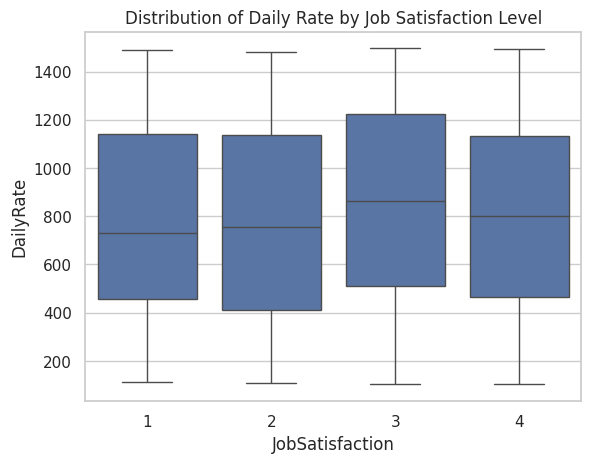

In [30]:
sns.boxplot(x='JobSatisfaction', y='DailyRate', data=df)
plt.title('Distribution of Daily Rate by Job Satisfaction Level')
plt.show()

In [32]:
print(df[['JobSatisfaction', 'DailyRate']].isnull().sum())

JobSatisfaction     0
DailyRate          27
dtype: int64


In [33]:

df_clean = df.dropna(subset=['JobSatisfaction', 'DailyRate'])

print(df_clean[['JobSatisfaction', 'DailyRate']].isnull().sum())

JobSatisfaction    0
DailyRate          0
dtype: int64


In [34]:
print(df_clean[['JobSatisfaction', 'DailyRate']].dtypes)


JobSatisfaction      int64
DailyRate          float64
dtype: object


In [35]:

grouped_data = [df_clean[df_clean['JobSatisfaction'] == level]['DailyRate'] for level in df_clean['JobSatisfaction'].unique()]


f_value, p_value = stats.f_oneway(*grouped_data)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")


F-value: 1.7213300135520782
P-value: 0.1609129915648026


3.) The ANOVA results show an F-value of 1.7213 and a p-value of 0.1609. Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This means there is no significant difference in the daily rate across the different job satisfaction levels.

In [36]:

print(df[['JobSatisfaction', 'MonthlyIncome']].isnull().sum())


JobSatisfaction    0
MonthlyIncome      0
dtype: int64


In [37]:

df_clean_income = df.dropna(subset=['JobSatisfaction', 'MonthlyIncome'])

print(df_clean_income[['JobSatisfaction', 'MonthlyIncome']].isnull().sum())


JobSatisfaction    0
MonthlyIncome      0
dtype: int64


In [38]:

print(df_clean_income[['JobSatisfaction', 'MonthlyIncome']].dtypes)


JobSatisfaction    int64
MonthlyIncome      int64
dtype: object


In [39]:

grouped_data_income = [df_clean_income[df_clean_income['JobSatisfaction'] == level]['MonthlyIncome'] for level in df_clean_income['JobSatisfaction'].unique()]

f_value_income, p_value_income = stats.f_oneway(*grouped_data_income)

print(f"F-value: {f_value_income}")
print(f"P-value: {p_value_income}")


F-value: 0.2838396980622007
P-value: 0.8370939355487876


4.) The ANOVA results show an F-value of 0.2838 and a p-value of 0.8371. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This means there is no significant difference in monthly income across the different job satisfaction levels.

In [49]:

def eta_squared(f_value, df_between, df_within):
    return f_value * (df_between / (df_between + df_within))

eta_squared_monthly_income = eta_squared(f_value_monthly_income, df_between, df_within)


print(f"Eta-squared for Monthly Income: {eta_squared_monthly_income}")


Eta-squared for Monthly Income: 0.0008283259671075896


In [52]:

age_variance_check = df.groupby('JobSatisfaction')['Age'].var()
daily_rate_variance_check = df.groupby('JobSatisfaction')['DailyRate'].var()


print("Variance in Age by Job Satisfaction level:\n", age_variance_check)
print("\nVariance in Daily Rate by Job Satisfaction level:\n", daily_rate_variance_check)


Variance in Age by Job Satisfaction level:
 JobSatisfaction
1    87.325444
2    86.199669
3    87.799755
4    91.639695
Name: Age, dtype: float64

Variance in Daily Rate by Job Satisfaction level:
 JobSatisfaction
1    165370.914211
2    174472.528459
3    169503.761092
4    157901.836906
Name: DailyRate, dtype: float64


In [53]:

missing_values_check = df.groupby('JobSatisfaction')[['Age', 'DailyRate']].apply(lambda x: x.isnull().sum())

print("Missing values in Age and Daily Rate by Job Satisfaction level:\n", missing_values_check)


Missing values in Age and Daily Rate by Job Satisfaction level:
                  Age  DailyRate
JobSatisfaction                
1                 29         10
2                 24          4
3                 45          7
4                 38          6


In [54]:

df_cleaned = df.dropna(subset=['Age', 'DailyRate'])


print("Cleaned dataset shape:", df_cleaned.shape)


grouped_age_cleaned = [df_cleaned[df_cleaned['JobSatisfaction'] == level]['Age'] for level in df_cleaned['JobSatisfaction'].unique()]
grouped_daily_rate_cleaned = [df_cleaned[df_cleaned['JobSatisfaction'] == level]['DailyRate'] for level in df_cleaned['JobSatisfaction'].unique()]

f_value_age_cleaned, p_value_age_cleaned = stats.f_oneway(*grouped_age_cleaned)
f_value_daily_rate_cleaned, p_value_daily_rate_cleaned = stats.f_oneway(*grouped_daily_rate_cleaned)

print(f"F-value for Age (cleaned): {f_value_age_cleaned}, P-value for Age (cleaned): {p_value_age_cleaned}")
print(f"F-value for Daily Rate (cleaned): {f_value_daily_rate_cleaned}, P-value for Daily Rate (cleaned): {p_value_daily_rate_cleaned}")


Cleaned dataset shape: (870, 35)
F-value for Age (cleaned): 0.06933327964876614, P-value for Age (cleaned): 0.9762720481827803
F-value for Daily Rate (cleaned): 1.8300268346526525, P-value for Daily Rate (cleaned): 0.14008671418554272


In [55]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['DailyRate'] = df['DailyRate'].fillna(df['DailyRate'].mean())

grouped_age_imputed = [df[df['JobSatisfaction'] == level]['Age'] for level in df['JobSatisfaction'].unique()]
grouped_daily_rate_imputed = [df[df['JobSatisfaction'] == level]['DailyRate'] for level in df['JobSatisfaction'].unique()]

f_value_age_imputed, p_value_age_imputed = stats.f_oneway(*grouped_age_imputed)
f_value_daily_rate_imputed, p_value_daily_rate_imputed = stats.f_oneway(*grouped_daily_rate_imputed)

print(f"F-value for Age (imputed): {f_value_age_imputed}, P-value for Age (imputed): {p_value_age_imputed}")
print(f"F-value for Daily Rate (imputed): {f_value_daily_rate_imputed}, P-value for Daily Rate (imputed): {p_value_daily_rate_imputed}")


F-value for Age (imputed): 0.07336832925872688, P-value for Age (imputed): 0.9742661776774604
F-value for Daily Rate (imputed): 1.7259711546494008, P-value for Daily Rate (imputed): 0.1599420037820119


5.) Age:
F-value: 0.0734
P-value: 0.9743
Interpretation: There is no significant difference in Age across different Job Satisfaction levels. This means that Age does not contribute much to explaining the variance in Job Satisfaction.

 Daily Rate:
F-value: 1.7260
P-value: 0.1599
Interpretation: There is no significant difference in Daily Rate across different Job Satisfaction levels. While the F-value is higher than that for Age, the p-value is still above 0.05, indicating that Daily Rate does not significantly contribute to the differences between Job Satisfaction levels.

 Monthly Income:
F-value: 0.2838
P-value: 0.8371
Eta-squared: 0.00083
Interpretation: Monthly Income also shows no significant difference across Job Satisfaction levels (p-value is well above 0.05), and the Eta-squared value is very small, indicating that it explains only a very small fraction of the variance in Job Satisfaction.
Conclusion:
None of the three variables (Age, Daily Rate, or Monthly Income) show significant differences across Job Satisfaction levels, and all three have very small effect sizes. Therefore, based on the results:

 None of these variables (Age, Daily Rate, or Monthly Income) contribute significantly to the differences between Job Satisfaction levels.

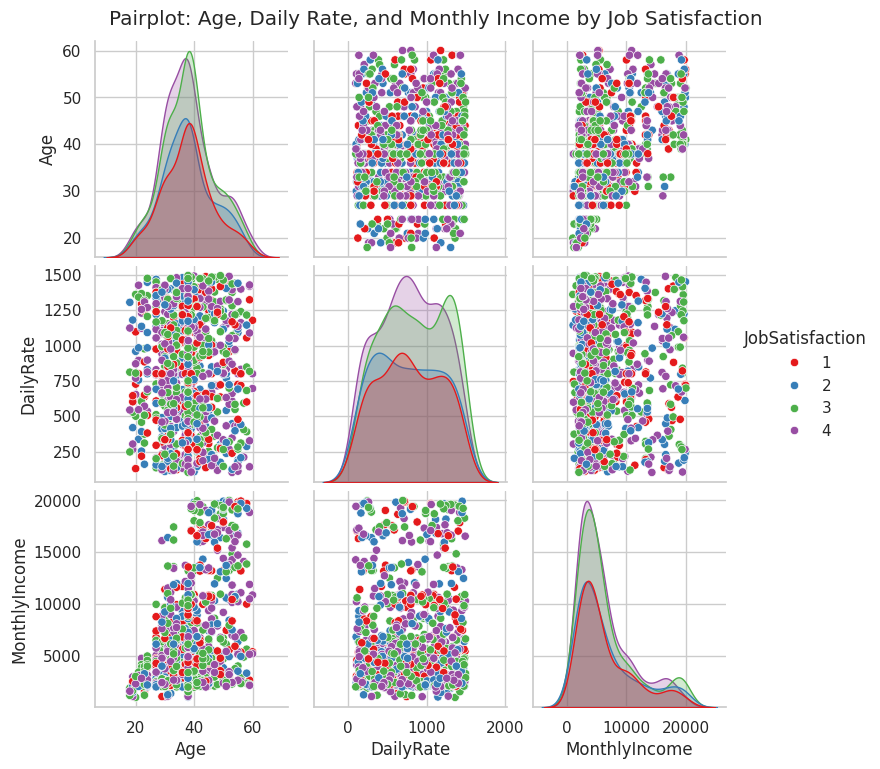

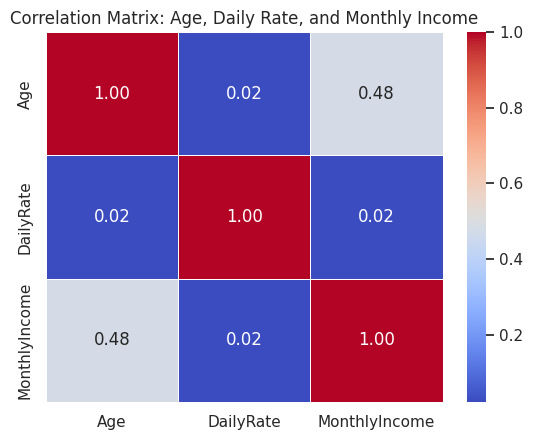

In [56]:

sns.pairplot(df[['Age', 'DailyRate', 'MonthlyIncome', 'JobSatisfaction']], hue='JobSatisfaction', palette='Set1')
plt.suptitle('Pairplot: Age, Daily Rate, and Monthly Income by Job Satisfaction', y=1.02)
plt.show()

correlation_matrix = df[['Age', 'DailyRate', 'MonthlyIncome']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Age, Daily Rate, and Monthly Income')
plt.show()

6.)
 **Age Distribution**: The distribution of age across job satisfaction levels appears roughly similar, with slight variations in density at certain age ranges. Job satisfaction levels don’t show a clear distinction in the age distribution, suggesting that age alone may not be a strong indicator of job satisfaction level.

**Daily Rate and Job Satisfaction**: Daily Rate distributions across job satisfaction levels seem fairly uniform, with most data points scattered throughout the range. There are no obvious separations between the job satisfaction groups in Daily Rate, implying that job satisfaction may not vary substantially based on the daily rate.

**Monthly Income and Job Satisfaction**: There’s a noticeable difference in Monthly Income distribution when grouped by job satisfaction levels. Higher job satisfaction (levels 3 and 4) seems to be associated with higher Monthly Incomes. Lower satisfaction levels (1 and 2) appear more frequent in the lower income range. This suggests that job satisfaction may be positively correlated with Monthly Income.

Interactions Between Age, Daily Rate, and Monthly Income:

In the scatterplots between Age and Monthly Income, there seems to be a broader distribution for higher income as age increases, especially for higher satisfaction levels.
No strong patterns emerge in the Age vs. Daily Rate and Daily Rate vs. Monthly Income scatterplots. The data points are dispersed evenly without clear clusters, indicating that these variables might not interact strongly with each other when grouped by job satisfaction.